In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math


path = "datasets/LEAF_LEVEL_DATASET_Yufeng_Ge.xlsx"

# Read and load dataset
df= pd.read_excel(path, sheet_name="in")





INPUT DATA

In [24]:
X = (df.iloc[:,14:]).values

lambda_min = 400
lambda_max = 800


X_constrained = X[:,lambda_min-350:lambda_max-350 + 1]
print(X_constrained[0])

[0.03722069 0.03544957 0.03552849 0.03732088 0.03899714 0.04070613
 0.04169688 0.0392432  0.03778272 0.03642266 0.03477097 0.03947091
 0.04187164 0.04091741 0.03962502 0.03997012 0.03989196 0.0391031
 0.03946016 0.04040634 0.04111709 0.04094271 0.03940286 0.03949113
 0.04052037 0.04060906 0.03876056 0.03851593 0.03995078 0.0405626
 0.04167417 0.04153634 0.04027074 0.04160991 0.04088282 0.03904886
 0.03825604 0.03919063 0.0389794  0.0379666  0.03823051 0.03898903
 0.03977431 0.04030783 0.04053397 0.04069805 0.04057507 0.0401313
 0.04018993 0.0404274  0.04021736 0.03924545 0.04036636 0.04177548
 0.04239769 0.04253088 0.04200823 0.04133256 0.04113628 0.04220515
 0.04232598 0.04184781 0.04208952 0.04190957 0.04195807 0.04231068
 0.04227056 0.04243844 0.04225523 0.04145408 0.04106227 0.04149621
 0.04213249 0.04204963 0.0420204  0.0418093  0.0416325  0.04224605
 0.04258008 0.04250033 0.04215915 0.04181876 0.0417235  0.04195558
 0.0424395  0.04280661 0.04317899 0.04346254 0.04327967 0.0435352

GAUSSIAN DISTRIBUTION

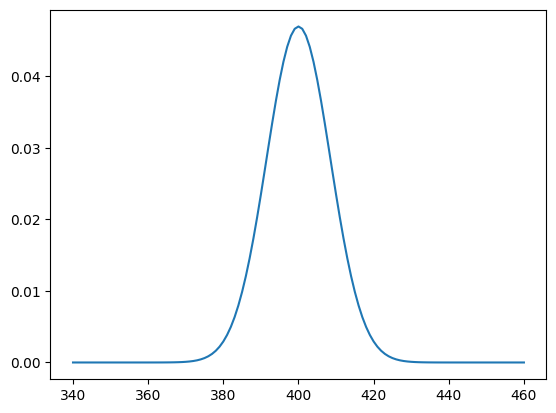

In [12]:

mu = 400
fwhm = 20
sigma = fwhm/(2*np.sqrt(2*np.log(2)))

def gaussian(r):
 return [(1/(sigma*np.sqrt(2*np.pi)))*np.exp((-1/2)*((x-mu)/sigma)**2) for x in r]


x = np.arange(mu-3*fwhm,mu+3*fwhm + 1, dtype=int)
y = gaussian(x)
plt.plot(x,y)
plt.show()

5 bands, fwhm = 20

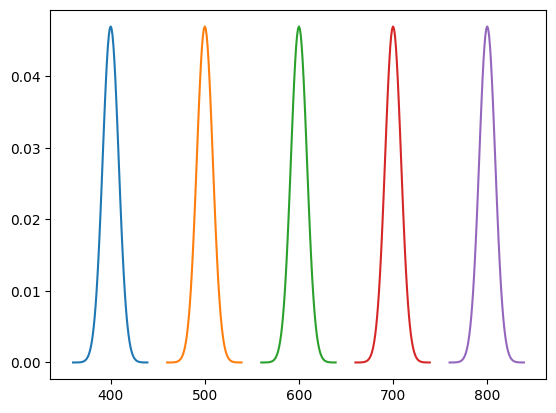

Filter len:  80
[3.58366882e-06 6.19643024e-06 1.05665852e-05 1.77708073e-05
 2.94753557e-05 4.82159082e-05 7.77859300e-05 1.23763091e-04
 1.94205105e-04 3.00545023e-04 4.58709609e-04 6.90471147e-04
 1.02502069e-03 1.50071813e-03 2.16693073e-03 3.08581813e-03
 4.33386145e-03 6.00287253e-03 8.20016554e-03 1.10475383e-02
 1.46787075e-02 1.92348815e-02 2.48582535e-02 3.16833512e-02
 3.98263962e-02 4.93730900e-02 6.03655285e-02 7.27892268e-02
 8.65614663e-02 1.01522313e-01 1.17429660e-01 1.33959495e-01
 1.50712267e-01 1.67225730e-01 1.82994063e-01 1.97492360e-01
 2.10204979e-01 2.20655674e-01 2.28437079e-01 2.33237028e-01
 2.34859320e-01 2.33237028e-01 2.28437079e-01 2.20655674e-01
 2.10204979e-01 1.97492360e-01 1.82994063e-01 1.67225730e-01
 1.50712267e-01 1.33959495e-01 1.17429660e-01 1.01522313e-01
 8.65614663e-02 7.27892268e-02 6.03655285e-02 4.93730900e-02
 3.98263962e-02 3.16833512e-02 2.48582535e-02 1.92348815e-02
 1.46787075e-02 1.10475383e-02 8.20016554e-03 6.00287253e-03
 4.33386

ValueError: x and y must have same first dimension, but have shapes (401,) and (80,)

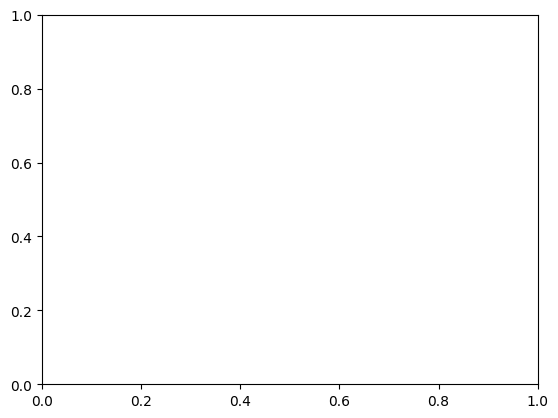

In [42]:
from math import sqrt, log

n_bands = 5
fwhm = 20
sigma = fwhm/(2*sqrt(2*log(2)))
mu_list= np.linspace(lambda_min,lambda_max,n_bands)
filters = []

for mu in mu_list:
    x = np.arange(mu-3*fwhm,mu+3*fwhm, dtype=int) #1nm delta
    y = gaussian(x)
    filters.append(y)
    plt.plot(x,y)


filters_len = len(filters[0])
plt.show()
print("Filter len: ", filters_len)

total_filter = np.sum([filter for filter in filters],axis=)
print(total_filter)
plt.plot(range(400,801),total_filter)

Apply Filter

In [68]:
'''Get First 4 signals'''

signals = X_constrained[:4]
filtered_signals = []

for signal in signals:
    filtered_signal = []
    for i, filter in enumerate(filters): 
        result = sum(filter*signal[filters_len*i:filters_len*(i+1)]) #1nm delta lambda



        filtered_signal.append(result)
    filtered_signals.append(filtered_signal)


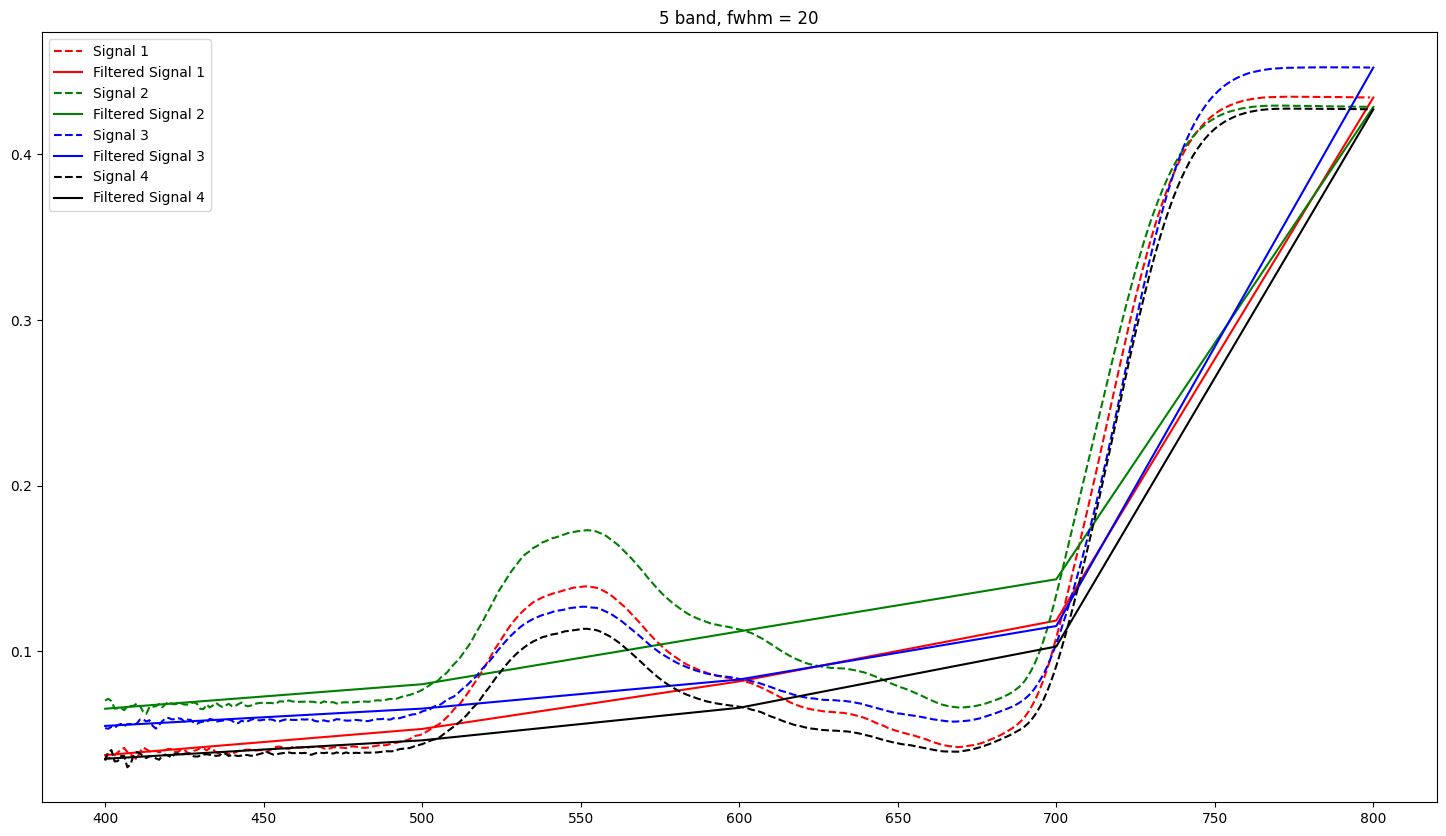

In [124]:
colors = ["r","g","b","k","y"]

keys = np.arange(400,800, dtype=int)
plt.figure(figsize=(18,10))

for i, filtered_signal in enumerate(filtered_signals):
    signal_to_plot = [signals[i][str(key)] for key in keys]
    plt.plot(keys, signal_to_plot,"--",color=colors[i], label=f"Signal {i+1}")
    plt.plot(mu_list,filtered_signal,color=colors[i],label=f"Filtered Signal {i+1}")


plt.title(f"{n_bands} band, fwhm = {fwhm}")
plt.legend()
plt.show()